In [1]:
#ref: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [2]:
# ARIMA - Autoregressive Integrated Moving Average Model

In [39]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
%matplotlib inline 


In [25]:
def parser(x):
	return datetime.strptime(x, '%d-%b-%Y')
 


Month
2018-01-01    266.0
2018-01-02    145.9
2018-01-03    183.1
2018-01-04    119.3
2018-01-05    180.3
Name: Sales, dtype: float64


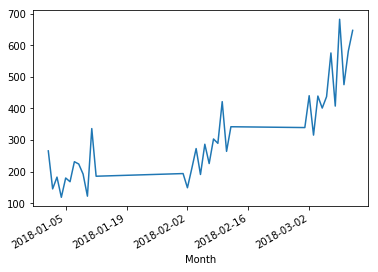

In [27]:
series = read_csv('data/sales-shampoo.csv', header = 0,parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

In [28]:
# Shampoo Sales dataset has a clear trend. This suggests that the time series is not stationary and will require 
# differencing to make it stationary, at least a difference order of 1.
# Let’s also take a quick look at an autocorrelation plot of the time series. This is also built-in to Pandas. 
# The example below plots the autocorrelation for a large number of lags in the time series.

/Users/sulbha/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


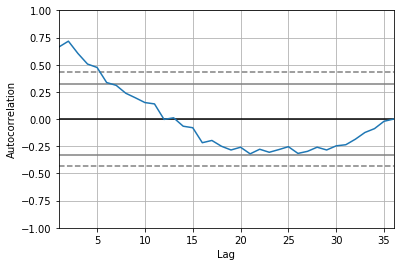

In [30]:
autocorrelation_plot(series)
pyplot.show()

In [31]:
# there is a positive correlation with the first 10-to-12 lags that is perhaps significant for the first 5 lags.
# A good starting point for the AR parameter of the model may be 5.

ARIMA with Python
The statsmodels library provides the capability to fit an ARIMA model.

An ARIMA model can be created using the statsmodels library as follows:

Define the model by calling ARIMA() and passing in the p, d, and q parameters.
The model is prepared on the training data by calling the fit() function.
Predictions can be made by calling the predict() function and specifying the index of the time or times to be predicted.
Let’s start off with something simple. We will fit an ARIMA model to the entire Shampoo Sales dataset and review the residual errors.

First, we fit an ARIMA(5,1,0) model. This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.

When fitting the model, a lot of debug information is provided about the fit of the linear regression model. We can turn this off by setting the disp argument to 0.

/Users/sulbha/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/sulbha/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Wed, 09 May 2018   AIC                            406.340
Time:                        16:47:21   BIC                            417.227
Sample:                    01-02-2018   HQIC                           410.098
                         - 03-12-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

/Users/sulbha/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


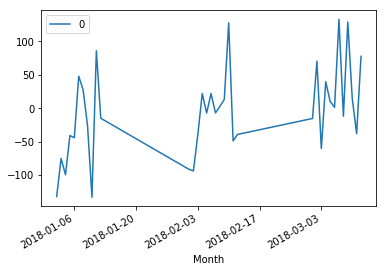

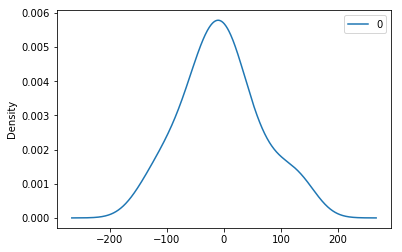

                0
count   35.000000
mean    -5.495083
std     68.132890
min   -133.296492
25%    -42.477757
50%     -7.186392
75%     24.748473
max    133.238093


In [33]:
from statsmodels.tsa.arima_model import ARIMA
 
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [34]:
# line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.

In [35]:
# density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.

In [36]:
# The distribution of the residual errors is displayed. The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals).

In [37]:
# Rolling Forecast ARIMA Model
# The ARIMA model can be used to forecast future time steps.

# We can use the predict() function on the ARIMAResults object to make predictions. It accepts the index of the time steps to make predictions as arguments. These indexes are relative to the start of the training dataset used to make predictions.
# by using the forecast() function, which performs a one-step forecast using the model.
# We can split the training dataset into train and test sets, use the train set to fit the model, and generate a prediction for each element on the test set.
# A rolling forecast is required given the dependence on observations in prior time steps for differencing and the AR model. A crude way to perform this rolling forecast is to re-create the ARIMA model after each new observation is received.
# We manually keep track of all observations in a list called history that is seeded with the training data and to which new observations are appended each iteration.

/Users/sulbha/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/sulbha/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/sulbha/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=349.117715, expected=342.300000
predicted=306.512914, expected=339.700000
predicted=387.376381, expected=440.400000
predicted=348.154130, expected=315.900000
predicted=386.308876, expected=439.300000
predicted=356.082039, expected=401.300000
predicted=446.379420, expected=437.400000
predicted=394.737314, expected=575.500000
predicted=434.915453, expected=407.600000
predicted=507.923401, expected=682.000000
predicted=435.483019, expected=475.300000
predicted=652.743789, expected=581.300000
predicted=546.343544, expected=646.900000
Test MSE: 6958.323


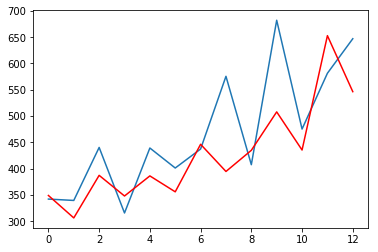

In [40]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# configuring ARIMA
Model Identification. Use plots and summary statistics to identify trends, seasonality, and autoregression elements to get an idea of the amount of differencing and the size of the lag that will be required.
Parameter Estimation. Use a fitting procedure to find the coefficients of the regression model.
Model Checking. Use plots and statistical tests of the residual errors to determine the amount and type of temporal structure not captured by the model.
The process is repeated until either a desirable level of fit is achieved on the in-sample or out-of-sample observations (e.g. training or test datasets).